# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


630

## Perform API Calls

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|hasaki
Processing record 2|ushuaia
Processing record 3|shu
Processing record 4|new norfolk
Processing record 5|kruisfontein
Processing record 6|malaut
Processing record 7|punta arenas
Processing record 8|hermanus
Processing record 9|carnarvon
City not found. skipping.
Processing record 10|wairoa
Processing record 11|yar-sale
Processing record 12|te anau
Processing record 13|killybegs
Processing record 14|qaanaaq
Processing record 15|mujiayingzi
Processing record 16|bluff
Processing record 17|albany
Processing record 18|butaritari
Processing record 19|castro
Processing record 20|samarai
Processing record 21|iberia
Processing record 22|sainte-maxime
Processing record 23|mataura
Processing record 24|cherskiy
Processing record 25|pierre
Processing record 26|torbay
Processing record 27|chipinge
Processing record 28|kieta
Processing record 29|ponta do sol
Processing record 30|skjervoy
Processing record 31|verkhnevilyuysk
Processing record 32|katsuura
Processing record 33|

Processing record 239|west bay
Processing record 240|khatanga
Processing record 241|pangnirtung
City not found. skipping.
Processing record 242|saint-prosper
Processing record 243|vardenis
City not found. skipping.
Processing record 244|lodeynoye pole
Processing record 245|bubaque
Processing record 246|lakes entrance
Processing record 247|lively
Processing record 248|nanakuli
Processing record 249|kurumkan
Processing record 250|nanortalik
Processing record 251|northam
Processing record 252|tongchuan
Processing record 253|lixourion
Processing record 254|somerset east
Processing record 255|san miguel
Processing record 256|kuala kangsar
Processing record 257|vestmannaeyjar
Processing record 258|nago
Processing record 259|esperance
Processing record 260|maningrida
Processing record 261|west lafayette
Processing record 262|rovaniemi
Processing record 263|pike creek
Processing record 264|nova olimpia
Processing record 265|touros
Processing record 266|kimbe
Processing record 267|nyurba
City n

City not found. skipping.
Processing record 479|waipawa
Processing record 480|puro
Processing record 481|sangmelima
Processing record 482|seybaplaya
Processing record 483|fort dodge
Processing record 484|rudolstadt
City not found. skipping.
City not found. skipping.
Processing record 485|srandakan
Processing record 486|ilhabela
Processing record 487|san jeronimo
Processing record 488|balatonfured
Processing record 489|mtimbira
Processing record 490|muros
Processing record 491|kautokeino
Processing record 492|danilov
Processing record 493|ketchikan
Processing record 494|mannarakkat
Processing record 495|tessalit
Processing record 496|fort nelson
Processing record 497|umm kaddadah
Processing record 498|chapleau
Processing record 499|khash
Processing record 500|antofagasta
City not found. skipping.
Processing record 501|saint marys
Processing record 502|tiarei
Processing record 503|umea
City not found. skipping.
Processing record 504|saint george
City not found. skipping.
City not found. 

In [6]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("city.csv")

In [7]:
# Display the City Data Frame
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Hasaki,75,JP,1571277491,68,35.73,140.83,66.20,9.17
1,Ushuaia,30,AR,1571277491,57,-54.81,-68.31,48.20,9.17
2,Shu,98,KZ,1571277492,49,43.60,73.76,54.93,7.72
3,New Norfolk,40,AU,1571277492,62,-42.78,147.06,59.00,10.29
4,Kruisfontein,0,ZA,1571277492,34,-34.00,24.73,64.45,5.99


## Latitude vs. Cloudiness Plot

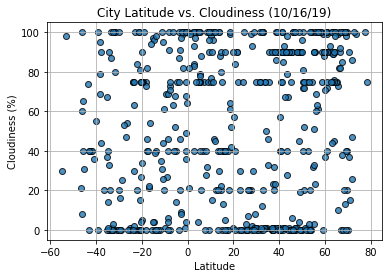

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# # Save the figure
# plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

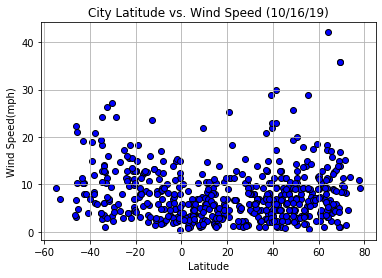

In [19]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.show()

## Linear Regression

In [22]:
# Create a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8758113210442698


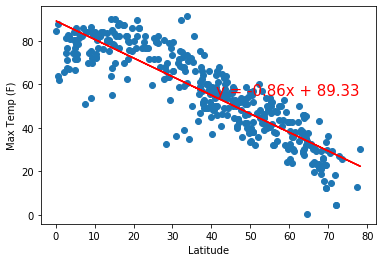

None


In [23]:
# Linear regression on Northern Hemisphere
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.6879055377468192


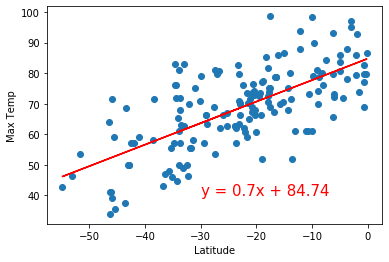

In [37]:
# Linear regression on Southern Hemisphere
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0956964906168938


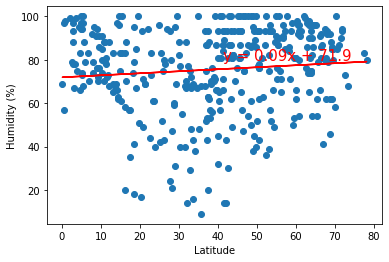

None


In [24]:
# Northern Hemisphere
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.1343905263179015


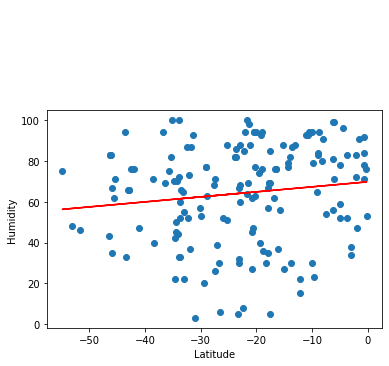

In [39]:
# Southern Hemisphere
# Southern Hemisphere
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09308452421013763


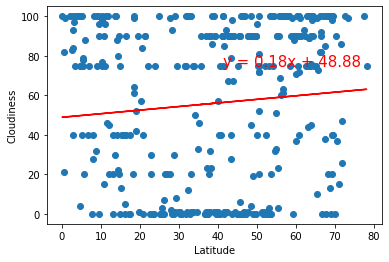

None


In [25]:
# Northern Hemisphere
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.09276074773932115


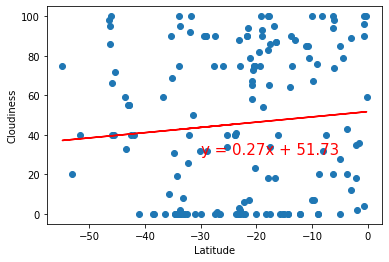

In [41]:
# Southern Hemisphere
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.23555054642552212


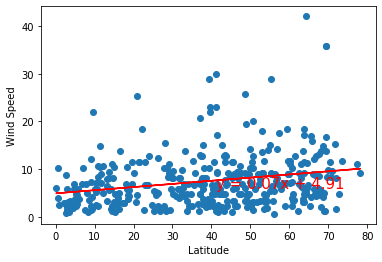

None


In [26]:
# Northern Hemisphere
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.35518370788523734


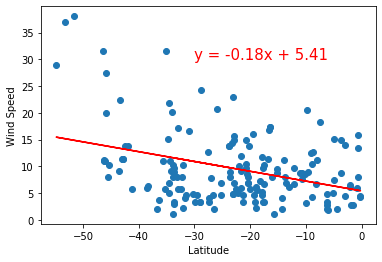

In [43]:
# Southern Hemisphere
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))


The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.